In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
Customers=pd.read_csv('CUSTOMERS.csv')
Sellers =pd.read_csv('SELLERS.csv')
Products =pd.read_csv('PRODUCTS.csv')
Orders =pd.read_csv('ORDERS.csv')
Order_Items =pd.read_csv('ORDER_ITEMS.csv')
Order_Payment=pd.read_csv('ORDER_PAYMENTS.csv')
Order_Review=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
Geo_Location=pd.read_csv('GEO_LOCATION.csv')

# 1. Perform Detailed exploratory analysis 
## a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) …) 

In [3]:
print('Total Revenue:',round(Order_Items['price'].sum(),2))

print('Total quantity =',Order_Items.shape[0])

print('Total products =',Products.product_id.nunique())

print('Total categories =',Products.product_category_name.nunique())

print('Total sellers =',Sellers.seller_id.nunique() )

print('Total locations =',Geo_Location.geolocation_zip_code_prefix.nunique())

print('Total payment methods =',Order_Payment.payment_type.nunique())

Total Revenue: 13591643.7
Total quantity = 112650
Total products = 32951
Total categories = 71
Total sellers = 3095
Total locations = 19015
Total payment methods = 5


# b. Understanding how many new customers acquired every month 


Text(0.5, 1.0, 'New Customers Acquired Each Month')

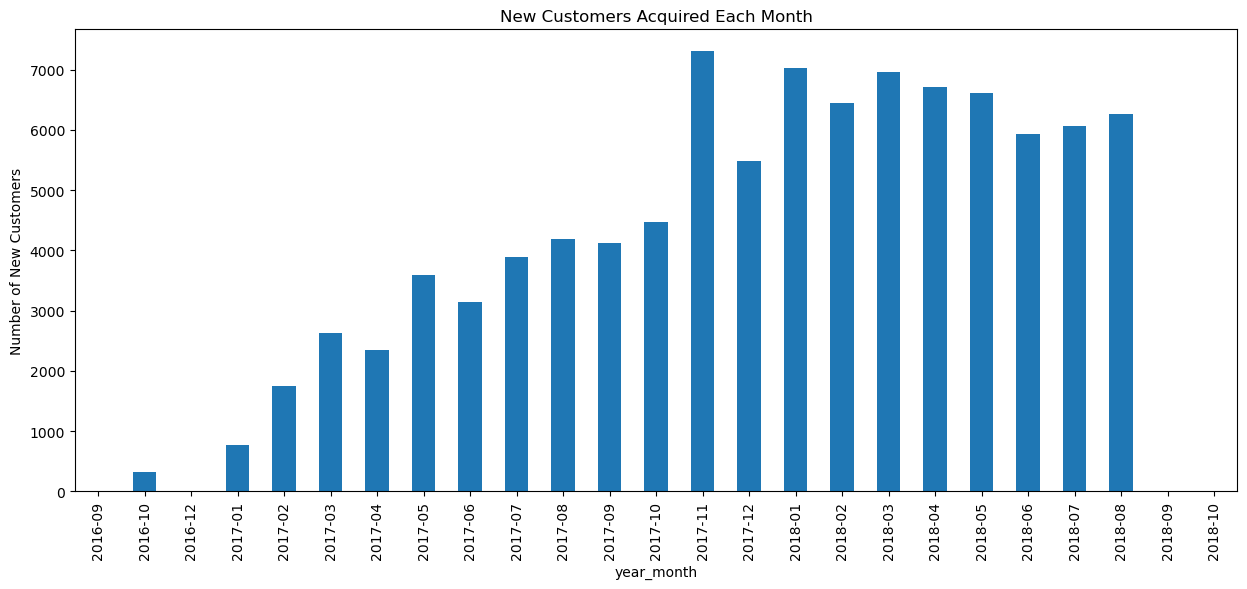

In [4]:
#convert into date time format
Orders['order_purchase_timestamp']=pd.to_datetime(Orders['order_purchase_timestamp'],format='%m/%d/%Y %H:%M')

#joining customer and order table
cus_order=pd.merge(Customers,Orders,on='customer_id',how='left')

#finding first purchase of each customer
first_purchase=cus_order.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()

#by year and month column
first_purchase['year_month']=first_purchase['order_purchase_timestamp'].dt.to_period('M')
first_purchase


#now by applying group by in first purchase table

new_cus_by_month=first_purchase.groupby('year_month')['customer_unique_id'].count()

#making bar graph
new_cus_by_month.plot(kind='bar',figsize=(15,6))
plt.ylabel('Number of New Customers')
plt.title('New Customers Acquired Each Month')



## c. Understand the retention of customers on month on month basis 


<Axes: xlabel='year_month'>

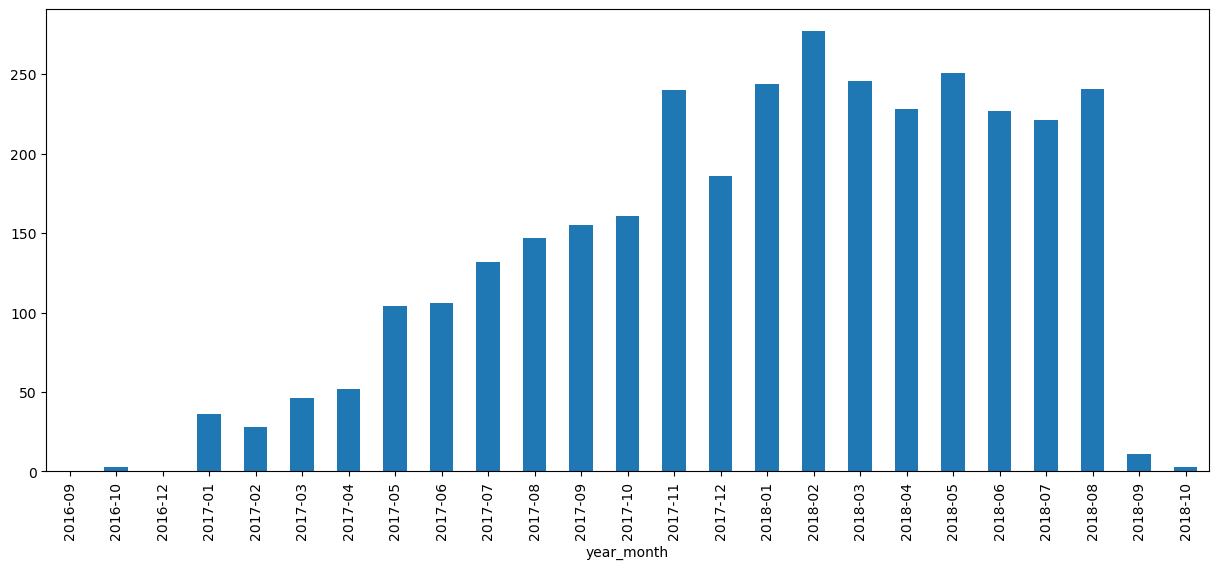

In [5]:
cus_order['year_month']=cus_order['order_purchase_timestamp'].dt.to_period('M')
cus_order

total_cus_by_month=cus_order.groupby('year_month')['customer_unique_id'].count()
total_cus_by_month


retention_table=pd.merge(total_cus_by_month, new_cus_by_month, on='year_month')
retention_table['retended_cus']=retention_table['customer_unique_id_x'] - retention_table['customer_unique_id_y']
retention_table['retended_cus'].plot(kind='bar',figsize=(15,6))

## d. How the revenues from existing/new customers on month on month basis 


<Axes: >

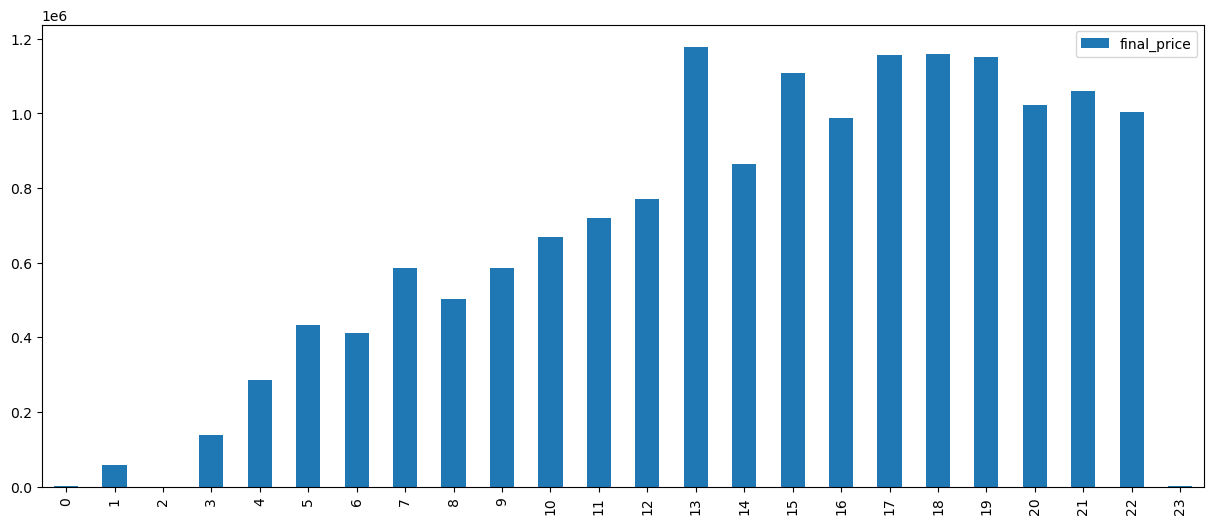

In [6]:
order_oitem_month=pd.merge(Order_Items,Orders,how='left',on='order_id')
order_oitem_month['year_month']=order_oitem_month['order_purchase_timestamp'].dt.to_period('M')
order_oitem_month['final_price']=order_oitem_month.price+order_oitem_month.freight_value
revenue_by_month=order_oitem_month.groupby('year_month')['final_price'].sum().reset_index()
revenue_by_month.plot(kind='bar',figsize=(15,6))

## e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…  

In [7]:
#lets define the dataset first 
# this dataframe contain order,order item and product table
order_item_prod=pd.merge(order_oitem_month,Products,how='left',on='product_id')
order_item_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  object        
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              112635 non-null  object        
 11  

In [8]:
# seasonality of quantity and sales by category
qty_by_cat=order_item_prod.groupby('product_category_name')['product_id'].count()
qty_by_cat

# seasonality of quantity and sales by category
rev_by_cat=order_item_prod.groupby('product_category_name')['final_price'].sum()
rev_by_cat

#merge both dataset
qty_rev_by_cat=pd.merge(qty_by_cat,rev_by_cat,left_on='product_category_name',right_on='product_category_name')
qty_rev_by_cat

,product_id,final_price
product_category_name,,
Agro_Industry_And_Commerce,212,78374.07
Air_Conditioning,297,61774.19
Art,209,28247.81
Arts_And_Craftmanship,24,2184.14
Audio,364,56398.94
...,...,...
Stationery,2517,277741.71
Tablets_Printing_Image,83,8754.61
Telephony,4545,394883.32


In [9]:
#dataset 
od_prod_cus=pd.merge(order_item_prod,Customers,left_on='customer_id',right_on='customer_id')
od_prod_cus_loc=pd.merge(od_prod_cus,Geo_Location,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')


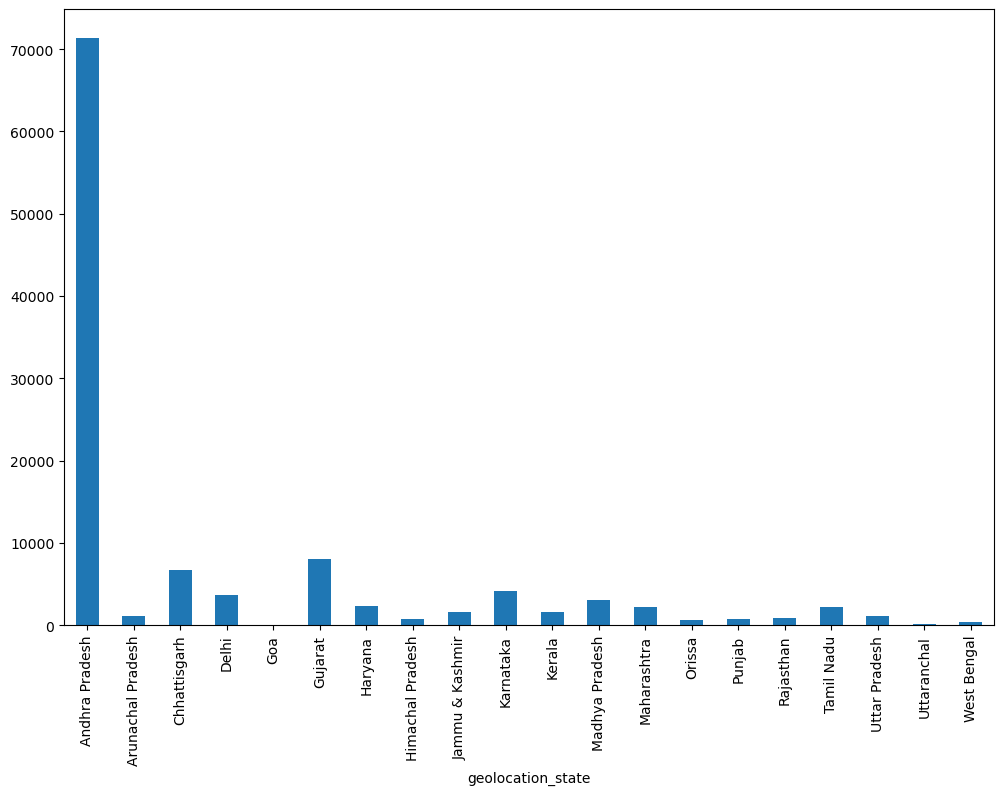

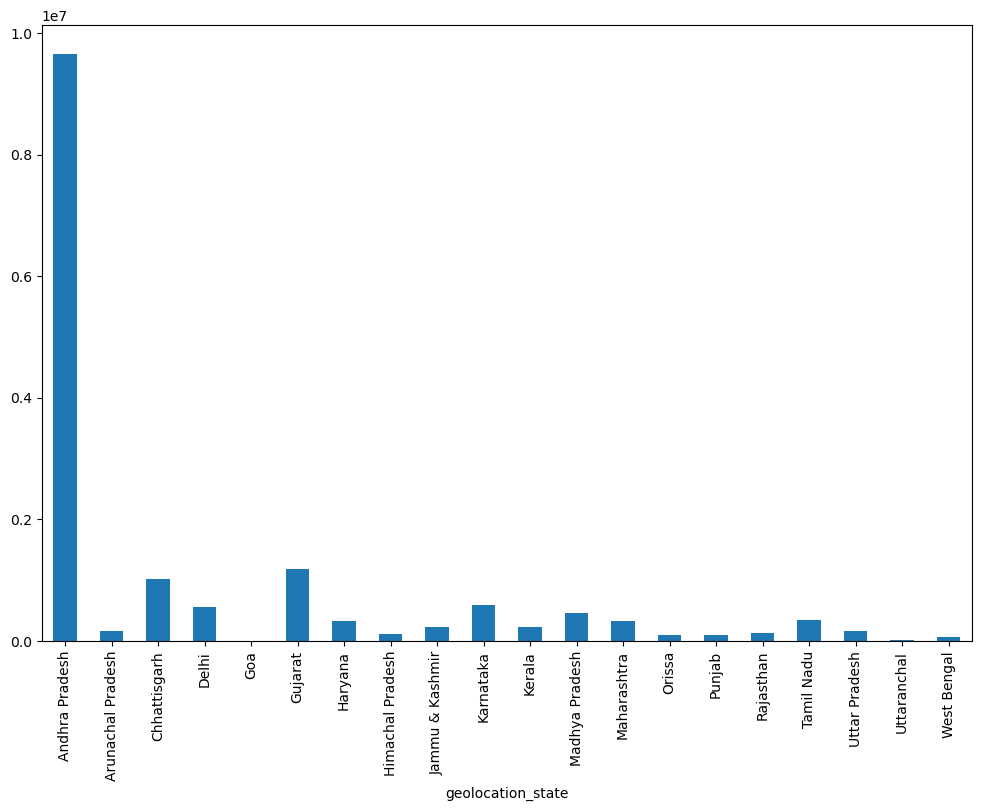

,product_id,final_price
geolocation_state,,
Andhra Pradesh,71315,9647083.02
Arunachal Pradesh,1119,167496.84
Chhattisgarh,6732,1025180.34
Delhi,3624,555490.52
Goa,9,912.80
Gujarat,8016,1179664.01
Haryana,2360,336278.86
Himachal Pradesh,780,113553.14
Jammu & Kashmir,1592,229379.18


In [10]:
# seasonality of quantity and sales by state
qty_by_state=od_prod_cus_loc.groupby('geolocation_state')['product_id'].count()
qty_by_state.plot(kind='bar',figsize=(12,8))
plt.show()

# seasonality of quantity and sales by state 
rev_by_state=od_prod_cus_loc.groupby('geolocation_state')['final_price'].sum()
rev_by_state.plot(kind='bar',figsize=(12,8))
plt.show()

#merge both dataset
qty_rev_by_state=pd.merge(qty_by_state,rev_by_state,left_on='geolocation_state',right_on='geolocation_state')
qty_rev_by_state

In [11]:
# seasonality of quantity and sales by city
qty_by_city=od_prod_cus_loc.groupby('customer_city')['product_id'].count()
qty_by_city

# seasonality of quantity and sales by city 
rev_by_city=od_prod_cus_loc.groupby('customer_city')['final_price'].sum()
rev_by_city


#merge both dataset
qty_rev_by_city=pd.merge(qty_by_city,rev_by_city,left_on='customer_city',right_on='customer_city')
qty_rev_by_city

,product_id,final_price
customer_city,,
Aadityana,18,1920.77
Aambaliyasan,2,242.94
Aantaliya,98,15650.04
Aarambhada,51,5971.05
Abiramam,1,89.19
...,...,...
Zamin Uthukuli,2,225.61
Ziauddin Pur,157,20593.75
Zira,4,568.43


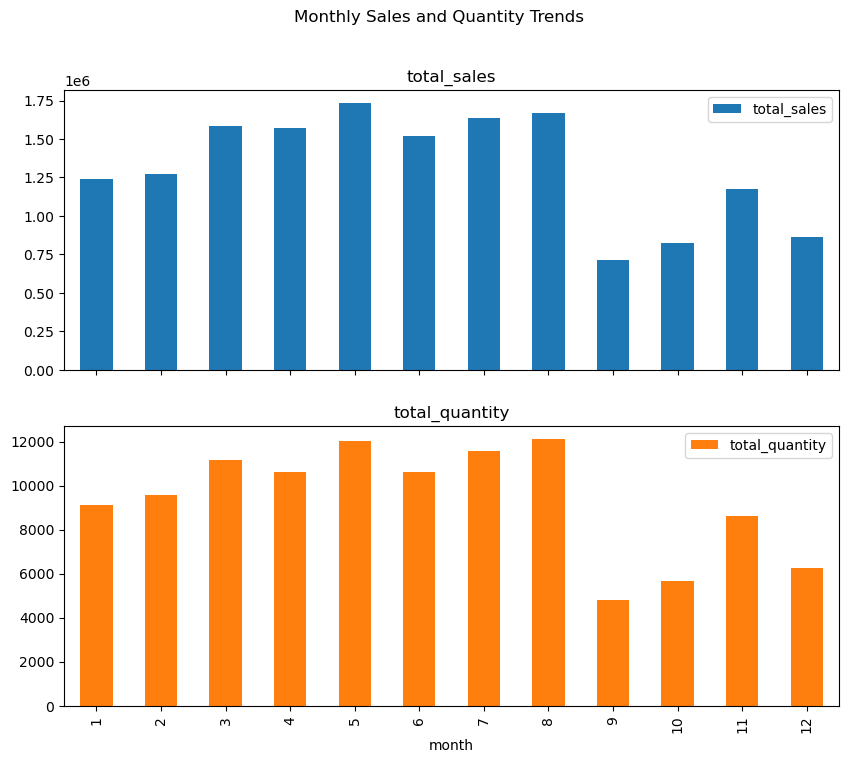

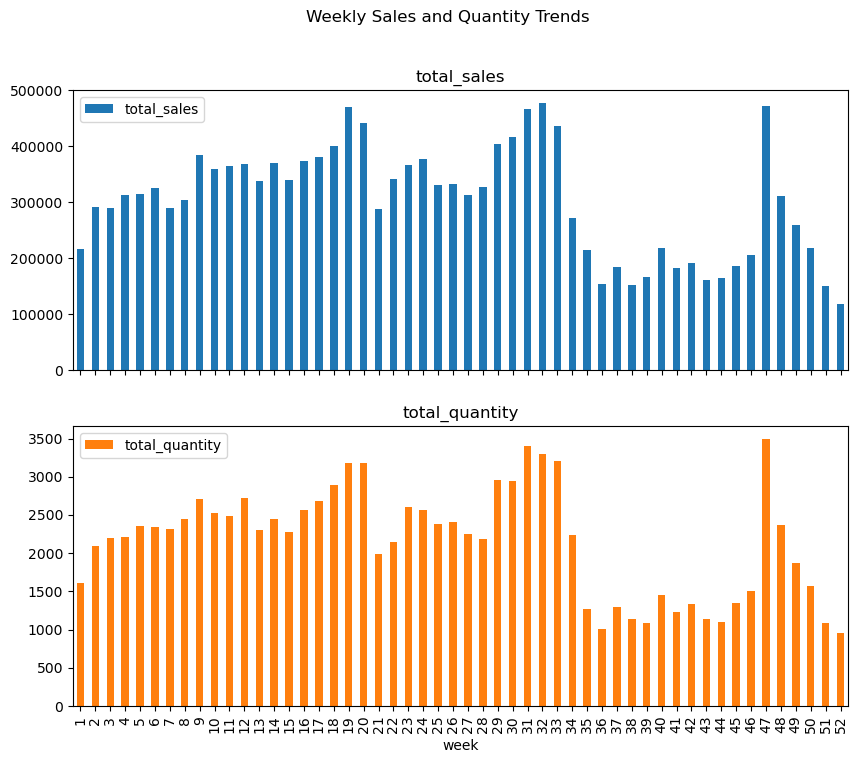

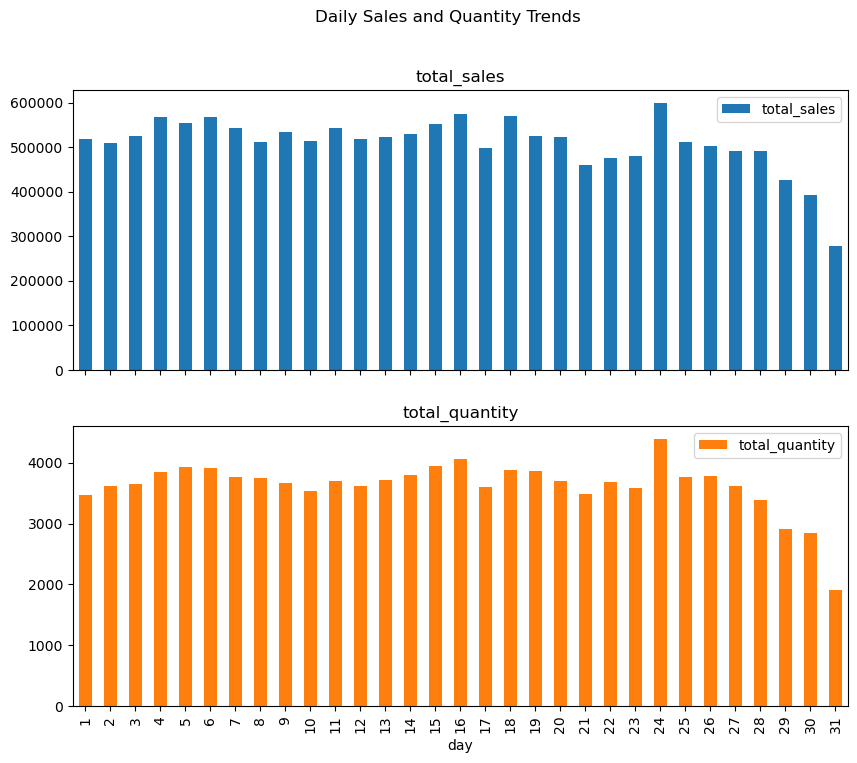

In [12]:

od_prod_cus_loc['month'] = od_prod_cus_loc['order_purchase_timestamp'].dt.month
od_prod_cus_loc['week'] = od_prod_cus_loc['order_purchase_timestamp'].dt.isocalendar().week
od_prod_cus_loc['day'] = od_prod_cus_loc['order_purchase_timestamp'].dt.day

# Function to calculate and plot trends
def plot_trends(df, time_unit, title):
    # Grouping by the specified time unit and calculating total sales and quantity
    trends = df.groupby(time_unit).agg({
        'final_price': 'sum',
        'order_item_id': 'count'  # Assuming each item in an order is a separate row
    }).rename(columns={'final_price': 'total_sales', 'order_item_id': 'total_quantity'})
    
    # Plotting the trends
    trends.plot(kind='bar', y=['total_sales', 'total_quantity'], subplots=True, layout=(2, 1), figsize=(10, 8), title=title)
    plt.show()

# Plotting monthly trends
plot_trends(od_prod_cus_loc, 'month', 'Monthly Sales and Quantity Trends')

# Plotting weekly trends
plot_trends(od_prod_cus_loc, 'week', 'Weekly Sales and Quantity Trends')

# Plotting daily trends
plot_trends(od_prod_cus_loc, 'day', 'Daily Sales and Quantity Trends')


## f. Popular Products by month, seller, state, category

In [13]:
prod_seller = order_item_prod.groupby(['seller_id','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_seller= prod_seller.sort_values(by=['seller_id','count']).drop_duplicates(subset='seller_id' ,keep='last')
prod_seller

,seller_id,product_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
34388,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
34397,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
34402,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
34430,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


## g. Popular categories by state, month


In [14]:
# Popular category by month
cat_month = order_item_prod.groupby(['year_month','product_category_name']).agg({'product_category_name':'count'}).rename(columns={'product_category_name':'count'}).reset_index()
cat_month= cat_month.sort_values(by=['year_month','count']).drop_duplicates(subset='year_month' ,keep='last')
cat_month

,year_month,product_category_name,count
1,2016-09,Health_Beauty,3
21,2016-10,Furniture_Decor,67
34,2016-12,Fashion_Bags_Accessories,1
56,2017-01,Furniture_Decor,182
105,2017-02,Furniture_Decor,266
155,2017-03,Furniture_Decor,328
187,2017-04,Bed_Bath_Table,274
246,2017-05,Bed_Bath_Table,369
303,2017-06,Bed_Bath_Table,382
363,2017-07,Bed_Bath_Table,579


## h. List top 10 most expensive products sorted by price


In [15]:
Order_Items['product_id']=Order_Items['product_id'].astype(str)
Products['product_id']=Products['product_id'].astype(str)


In [16]:
prod_orders=pd.merge(Order_Items, Products, left_on='product_id',right_on='product_id', how='left')
df=prod_orders.drop_duplicates(subset=['product_category_name','price'])
df1=df[['product_category_name','price']]
df1.sort_values(by='price',ascending=False).head(10)

,product_category_name,price
3556,Housewares,6735.00
112233,Computers,6729.00
107841,Art,6499.00
74336,Small_Appliances,4799.00
11249,Small_Appliances,4690.00
62086,Computers,4590.00
29193,Musical_Instruments,4399.87
45843,Consoles_Games,4099.99
78310,Sports_Leisure,4059.00
59137,Watches_Gifts,3999.90


## 2. Performing Customers/sellers Segmentation
## a. Divide the customers into groups based on the revenue generated

In [65]:
cus_by_rev=order_item_prod.groupby('customer_id')['final_price'].sum().sort_values(ascending=False)
cus_by_rev

# Define custom bins
bins =  np.arange(0,int(cus_by_rev.max())+500,1000)
labels = ['0-1k','1k-2k','2k-3k','3k-4k','4k-5k','6k-7k','7k-8k','8k-9k','9k-10k','10k-11k','11k-12k','12k-13k','13k-14k','14k-15k']

# Categorize the customers into the bins
cus_by_rev_binned = pd.cut(cus_by_rev, bins=bins, labels=labels, right=False)
cus_by_rev_binned.value_counts().reset_index()

,final_price,count
0,0-1k,97518
1,1k-2k,939
2,2k-3k,160
3,3k-4k,31
4,4k-5k,12
5,7k-8k,4
6,8k-9k,1
7,14k-15k,1
8,6k-7k,0
9,9k-10k,0


## 2. Performing Customers/sellers Segmentation
## b. Divide the sellers into groups based on the revenue generated

In [66]:
seller_div=pd.merge(Order_Items, Sellers , left_on='seller_id',right_on='seller_id')
seller_div['final_price']= seller_div['price']+seller_div['freight_value']

seller_by_rev=seller_div.groupby('seller_id')['final_price'].sum().sort_values(ascending=False)




# Define custom bins
bins =  np.arange(0,int(seller_by_rev.max())+500,40000)
labels = ['0-40k','40k-80k','80k-120k','120k-160k','160k-200k','200k-250k']

# Categorize the customers into the bins
seller_by_rev_binned = pd.cut(seller_by_rev, bins=bins, labels=labels, right=False)
seller_by_rev_binned.value_counts().reset_index()

,final_price,count
0,0-40k,3024
1,40k-80k,51
2,120k-160k,8
3,160k-200k,5
4,200k-250k,4
5,80k-120k,2


## 3. Cross-Selling (Which products are selling together) top 10 combinations of products are selling r)

In [68]:
from itertools import combinations
from collections import Counter

# Group products by order_id
grouped = order_item_prod.groupby('order_id')['product_id'].apply(list)

# Function to create combinations of products
def get_combinations(products, n):
    return list(combinations(products, n))

# Create combinations of 2 products
two_product_combinations = grouped.apply(lambda x: get_combinations(x, 2))

# Flatten the list of combinations and count frequency
combination_counter = Counter([item for sublist in two_product_combinations for item in sublist])

# Get the top 10 most common combinations
top_10_combinations = combination_counter.most_common(10)

# Display the top 10 combinations and their counts
for combination, count in top_10_combinations:
    print(f"Combination: {combination}, Count: {count}")


Combination: ('422879e10f46682990de24d770e7f83d', '422879e10f46682990de24d770e7f83d'), Count: 279
Combination: ('ee3d532c8a438679776d222e997606b3', 'ee3d532c8a438679776d222e997606b3'), Count: 195
Combination: ('9571759451b1d780ee7c15012ea109d4', '9571759451b1d780ee7c15012ea109d4'), Count: 190
Combination: ('a62e25e09e05e6faf31d90c6ec1aa3d1', 'a62e25e09e05e6faf31d90c6ec1aa3d1'), Count: 141
Combination: ('368c6c730842d78016ad823897a372db', '368c6c730842d78016ad823897a372db'), Count: 139
Combination: ('b532349fe46b38fbc7bb3914c1bdae07', 'b532349fe46b38fbc7bb3914c1bdae07'), Count: 134
Combination: ('d5991653e037ccb7af6ed7d94246b249', 'd5991653e037ccb7af6ed7d94246b249'), Count: 123
Combination: ('53759a2ecddad2bb87a079a1f1519f73', '53759a2ecddad2bb87a079a1f1519f73'), Count: 119
Combination: ('89b190a046022486c635022524a974a8', '89b190a046022486c635022524a974a8'), Count: 115
Combination: ('aca2eb7d00ea1a7b8ebd4e68314663af', 'aca2eb7d00ea1a7b8ebd4e68314663af'), Count: 111


## 4. Payment Behaviour
## a. How customers are paying?s?

In [70]:
pay_types=Order_Payment.payment_type.drop_duplicates().reset_index()
print('Payment methods are:',pay_types.drop(columns = 'index'))

Payment methods are:   payment_type
0  credit_card
1          UPI
2      voucher
3   debit_card
4  not_defined


## 4. Payment Behaviour

## b. Which payment channels are used by most customers?

In [21]:
cus_pay=pd.merge(od_prod_cus,Order_Payment,how='left',left_on='order_id',right_on='order_id')
channel_by_cus=cus_pay.groupby('payment_type')['customer_id'].count().sort_values(ascending=False).reset_index()
channel_by_cus

,payment_type,customer_id
0,credit_card,86769
1,UPI,22867
2,voucher,6274
3,debit_card,1691


In [22]:
channel_by_rev=cus_pay.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False).reset_index()
channel_by_rev

,payment_type,payment_value
0,credit_card,15589028.22
1,UPI,4059699.60
2,voucher,405873.03
3,debit_card,253533.86


## 5. Customer satisfaction towards category & product
## a. Which categories (top 10) are maximum rated & minimum rated?tc.

In [23]:
cus_sat=pd.merge(order_item_prod,Order_Review,left_on='order_id',right_on='order_id',how='left')

sat_by_cat=cus_sat.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).reset_index()
sat_by_cat.head(10)

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.439421
3,Books_Imported,4.400000
4,Costruction_Tools_Tools,4.359223
5,Books_Technical,4.338290
6,Luggage_Accessories,4.309524
7,Food_Drink,4.303571
8,Small_Appliances_Home_Oven_And_Coffee,4.302632
9,Fashion_Sport,4.258065


In [26]:
sat_by_cat=cus_sat.groupby('product_category_name')['review_score'].mean().sort_values(ascending=True).reset_index()
sat_by_cat.head(10)

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.366667
3,Office_Furniture,3.484421
4,Fashion_Male_Clothing,3.621212
5,Fixed_Telephony,3.671698
6,Party_Supplies,3.767442
7,Fashio_Female_Clothing,3.780000
8,La_Cuisine,3.785714
9,Audio,3.808219


## 5. Customer satisfaction towards category & product
## b. Which products (top10) are maximum rated & minimum rated?

In [29]:
sat_by_pro=cus_sat.groupby('product_id')['review_score'].mean().sort_values(ascending=False).reset_index()
sat_by_pro.head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,86743ff92eee3d16b7df59cddd583b8c,5.0
2,868ceb027ab706a4dee42e2220006b85,5.0
3,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
4,868766ed2172644fdd977d6bd395a107,5.0
5,8684bd8f93b4f4038d07188a23811e93,5.0
6,867c96d2bb67aba6500a4c509cf76072,5.0
7,867b820367ec206b38a357f2c12454b7,5.0
8,867901d7e8488fb97f1fb538c09d476e,5.0
9,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [30]:
sat_by_pro=cus_sat.groupby('product_id')['review_score'].mean().sort_values(ascending=True).reset_index()
sat_by_pro.head(10)

,product_id,review_score
0,592cc6634d2c783d297effc0b828bc37,1.0
1,28c95d7653177449fd4b6fc7adb63ce9,1.0
2,28d6d6a10ceb0636ae572e7efafef612,1.0
3,28d7da9ebe96bfda54aed060b68b23a1,1.0
4,8c4e5e50a08a443b7fbad34ad7587625,1.0
5,8c4dc358af6e14174f2114be62c18f37,1.0
6,8c4456c061013adccb1ba4cbce2d0365,1.0
7,8c35dc99b37ba51780800ba049ed3616,1.0
8,28fe66c8a81afe9be7829f40a5fae9ee,1.0
9,ee37349d258101b9d573a256d1401ff7,1.0


## 5. Customer satisfaction towards category & product
## c. Average rating by location, seller, product, category, month etc.

In [47]:
cus_sat_loc=pd.merge(cus_sat,Sellers,left_on='seller_id',right_on='seller_id')

# Average rating by seller
avg_sat_by_sel=cus_sat_loc.groupby('seller_id')['review_score'].mean().sort_values(ascending=False).reset_index()
avg_sat_by_sel

,seller_id,review_score
0,c18309219e789960add0b2255ca4b091,5.0
1,c7246702dc991a06d788120dc7544391,5.0
2,eaaa46e98c9e61f6764dd1d7a2ab8b3e,5.0
3,466222e777149751370e7e98fb623b0c,5.0
4,ea846a0e7ad98a741783e886d89dfa44,5.0
...,...,...
3090,dc120d932ddf9d4dfb6fd68beefda622,1.0
3091,749e7cdabbaf72f16677859e27874ba5,1.0
3092,dadc51ef321949ec9a3ab25cd902e23d,1.0
3093,da2782c804606d2a5d8e1760dbb3e7ec,1.0


In [64]:
# Average rating by location,
avg_sat_by_state=cus_sat_loc.groupby('customer_state_y')['review_score'].mean().sort_values(ascending=False).reset_index()

avg_sat_by_state               

,customer_state_y,review_score
0,Goa,4.800000
1,Punjab,4.159732
2,Uttar Pradesh,4.138840
3,Rajasthan,4.121381
4,Haryana,4.110356
5,Tamil Nadu,4.105063
6,Orissa,4.100295
7,Maharashtra,4.083925
8,Kerala,4.051774
9,Arunachal Pradesh,4.040094
